In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




Read Data set

In [3]:
df=pd.read_csv("/content/drive/MyDrive/project/healthcare-dataset-stroke-data.csv")


In [4]:
print(df.to_string())

         id  gender    age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0      9046    Male  67.00             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1     51676  Female  61.00             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2     31112    Male  80.00             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3     60182  Female  49.00             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4      1665  Female  79.00             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1
5     56669    Male  81.00             0              0          Yes        Private          Urban        

Head of Dataset

In [5]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

Tail of Dataset

In [6]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

Dataset size

In [7]:
df.shape

(5110, 12)

Information of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Find Null values

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Perceentage of null values

In [10]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Duplicates in Data

In [11]:
df.duplicated().sum()

0

Removing Id Column

In [12]:
# removing id column in data set
df1=df.iloc[:,1:]
df1

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

Statistical description of numerical features

In [13]:
df1.describe().T

count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  77.245  91.885   
bmi                4909.0   28.893237   7.854067  10.30  23.500  28.100   
stroke             5110.0    0.048728   0.215320   0.00   0.000   0.000   

                      75%     max  
age                 61.00   82.00  
hypertension         0.00    1.00  
heart_disease        0.00    1.00  
avg_glucose_level  114.09  271.74  
bmi                 33.10   97.60  
stroke               0.00    1.00

Statistical description of categorical features

In [14]:
df.describe(include="object").T

count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
smoking_status  5110      4  never smoked  1892



```
# This is formatted as code
```

Analysis of each feature

<ipython-input-15-a1964967d1dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-15-a1964967d1dc>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-15-a1964967d1dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-15-a1964967d1dc>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
<ipython-input-15-a1964967d1dc>:4: FutureW

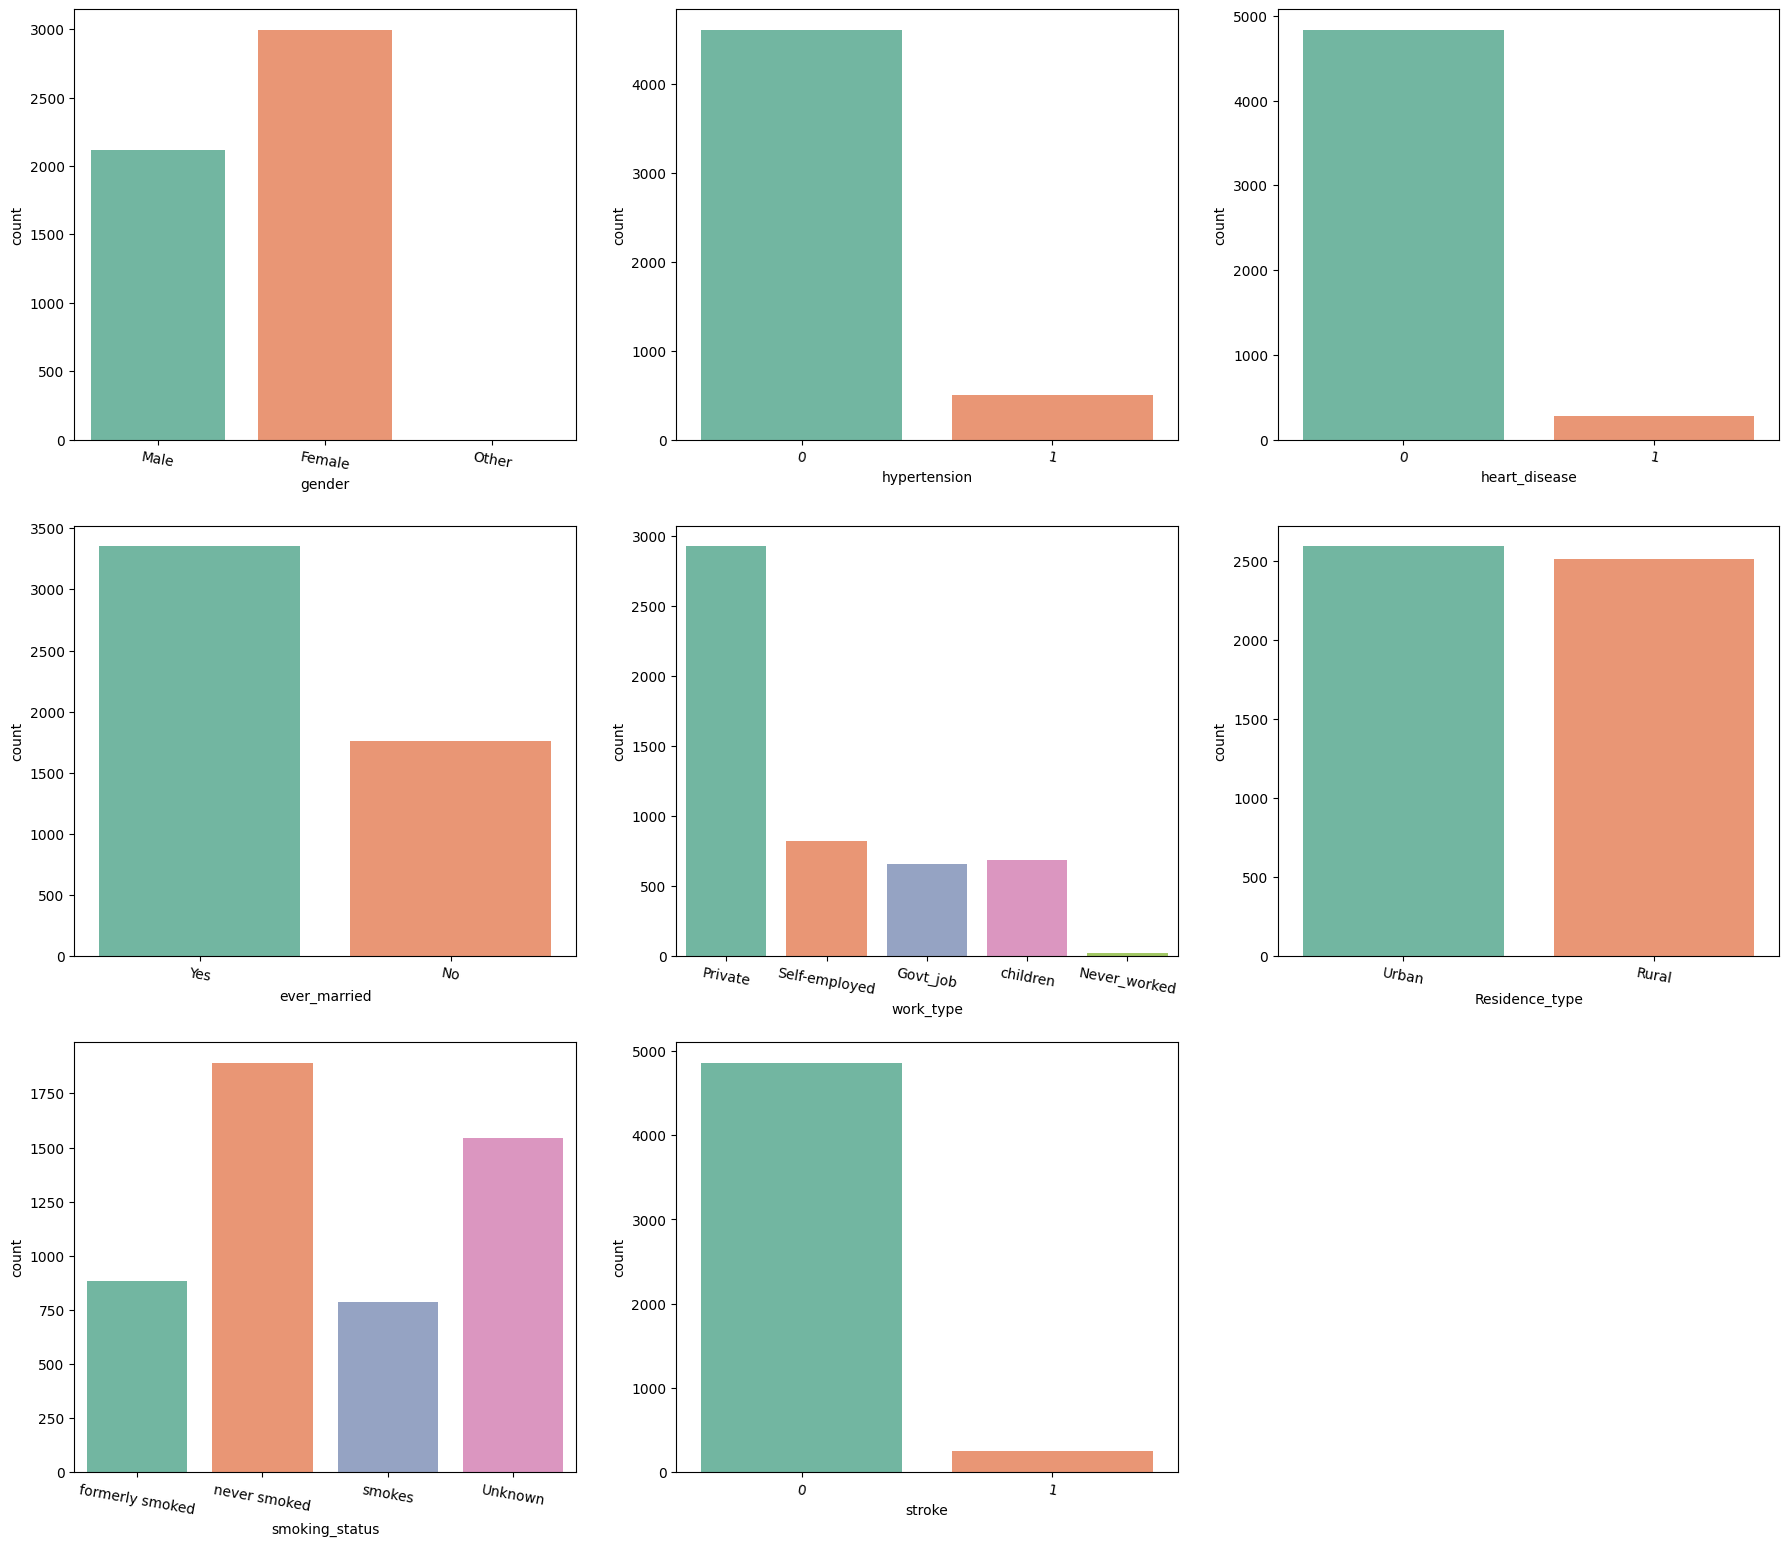

In [15]:
plt.figure(figsize=(22,19))
for i,col in enumerate(df1.select_dtypes(exclude=float).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette =sns.color_palette("Set2"))
    plt.xticks(rotation=-10)

[4861, 249]


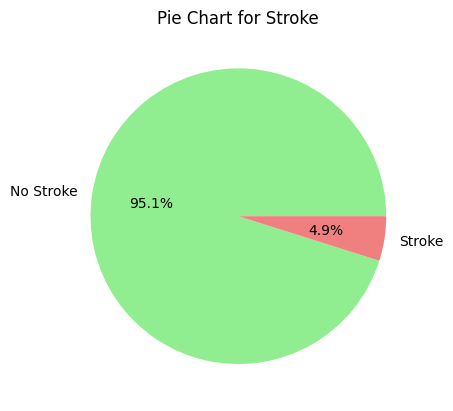

In [16]:
# prompt: pie chart for stroke

import matplotlib.pyplot as plt
# Pie chart for stroke
labels = ['No Stroke', 'Stroke']
sizes = [df['stroke'].value_counts()[0], df['stroke'].value_counts()[1]]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pie Chart for Stroke')
print(sizes)
plt.show()


Analysis of numerical continuos features

<ipython-input-17-c9a86170f7ad>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df1,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
<ipython-input-17-c9a86170f7ad>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df1,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))
<ipython-input-17-c9a86170f7ad>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df1,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))


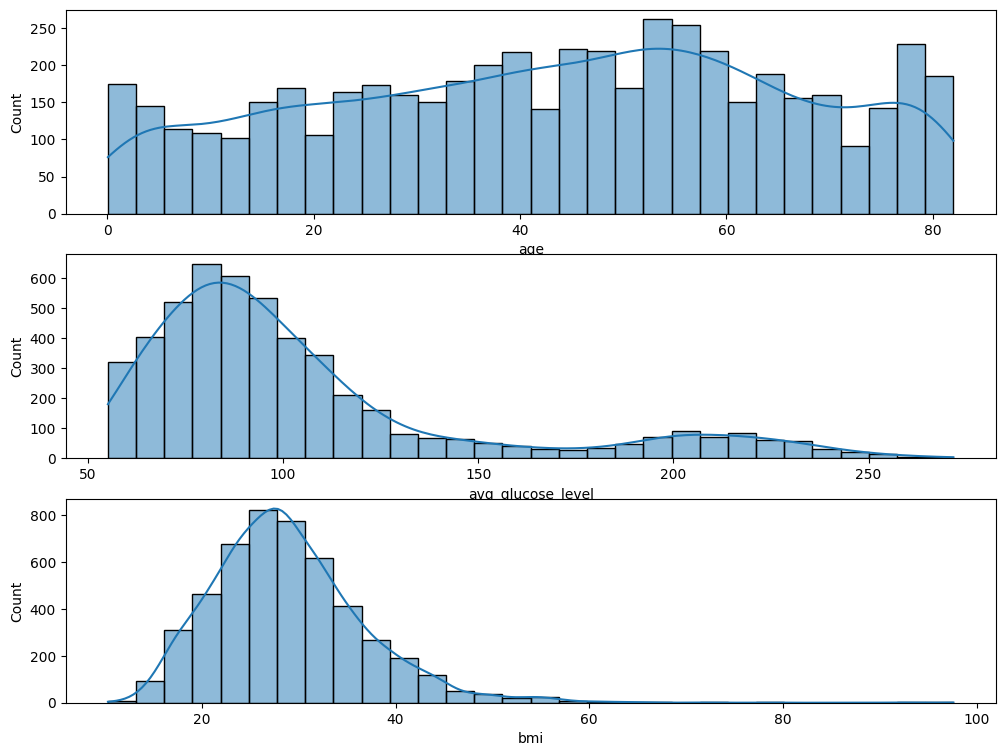

In [17]:
plt.figure(figsize=(12,9))
for i,col in enumerate(df1.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.histplot(data=df1,x=col,kde=True,bins=30,palette =sns.color_palette("Set2"))

Analysis of Target  feature with the other features

Stroke & Gender

<ipython-input-18-40b7e6b71730>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(df,x="stroke",hue="gender",palette =sns.color_palette("Set2"))


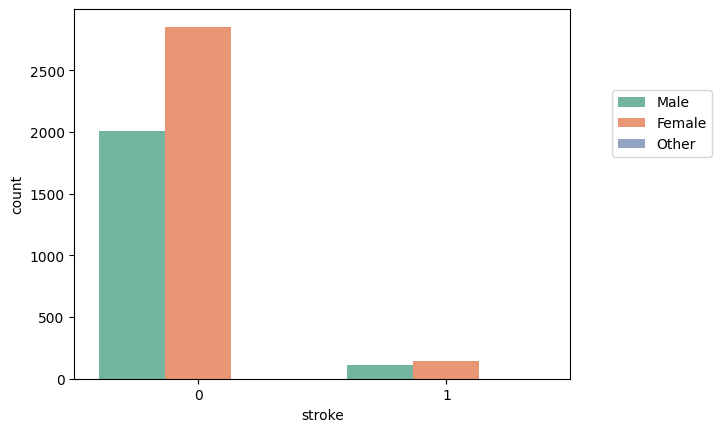

In [18]:
sns.countplot(df,x="stroke",hue="gender",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.3,0.8))


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

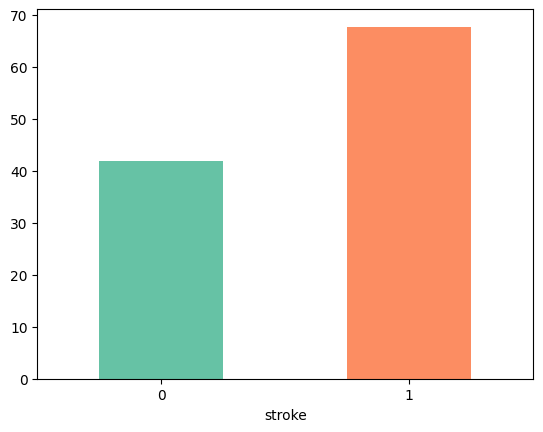

In [19]:
df1.groupby("stroke")["age"].mean().plot(kind="bar",color = sns.color_palette("Set2"))
plt.xticks(rotation=0)

Stroke & work_type

<ipython-input-20-ac286080ef91>:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(df,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))


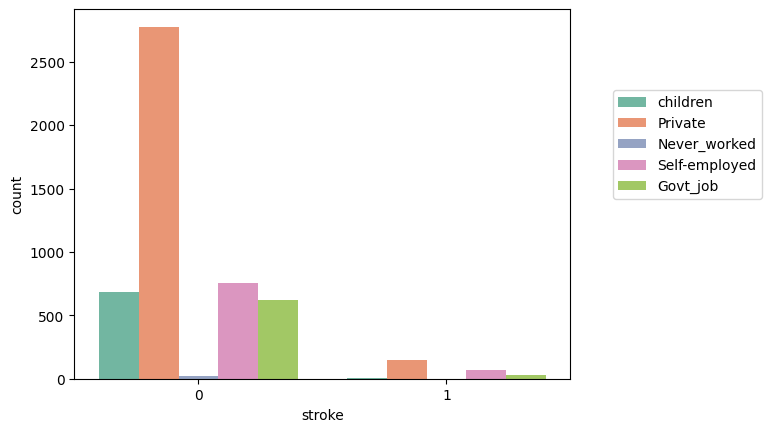

In [20]:
sns.countplot(df,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

Stroke & smoking_status

<ipython-input-21-519cf55d36e2>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(df,x="stroke",hue="smoking_status",palette =sns.color_palette("Set2"))


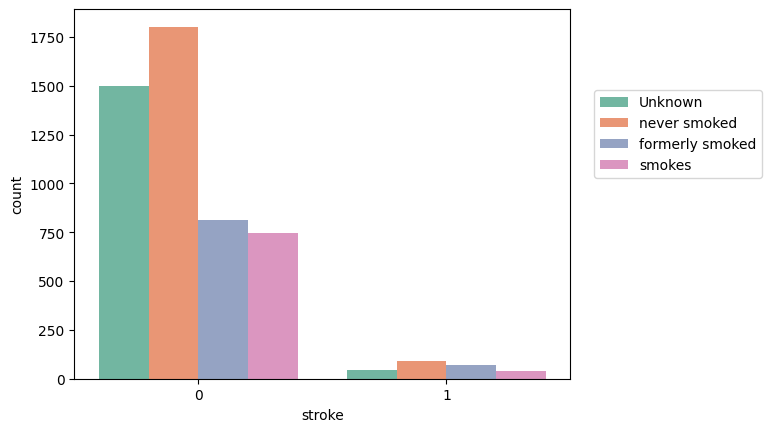

In [21]:
sns.countplot(df,x="stroke",hue="smoking_status",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

In [22]:
pd.crosstab(df1.stroke,df1.hypertension)


hypertension     0    1
stroke                 
0             4429  432
1              183   66

Stroke & Hyper_Tension

<ipython-input-23-0de1e505326a>:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(df1,x="stroke",hue="hypertension",palette =sns.color_palette("Set2"))


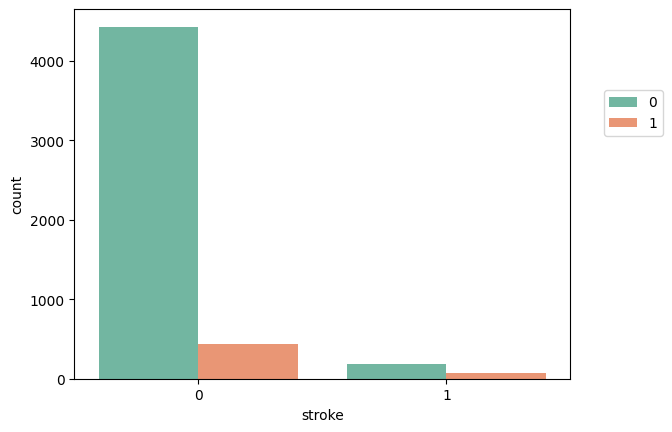

In [23]:
sns.countplot(df1,x="stroke",hue="hypertension",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.2,0.8))


In [24]:
df1.groupby("stroke")["bmi"].mean()


stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

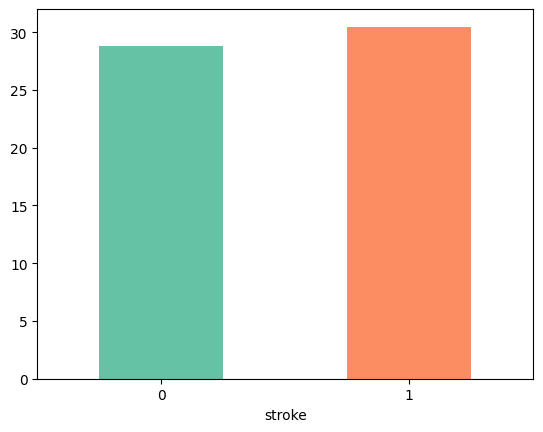

In [25]:
df1.groupby("stroke")["bmi"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
plt.xticks(rotation=0)

In [27]:
# df1.groupby("stroke")["avg_glucose_level"].mean().plot(kind="bar",color =sns.color_palette("Set2"))
# plt.xticks(rotation=0)

In [28]:
df1.describe().T


count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00   0.000   0.000   
heart_disease      5110.0    0.054012   0.226063   0.00   0.000   0.000   
avg_glucose_level  5110.0  106.147677  45.283560  55.12  77.245  91.885   
bmi                4909.0   28.893237   7.854067  10.30  23.500  28.100   
stroke             5110.0    0.048728   0.215320   0.00   0.000   0.000   

                      75%     max  
age                 61.00   82.00  
hypertension         0.00    1.00  
heart_disease        0.00    1.00  
avg_glucose_level  114.09  271.74  
bmi                 33.10   97.60  
stroke               0.00    1.00

**outliers**

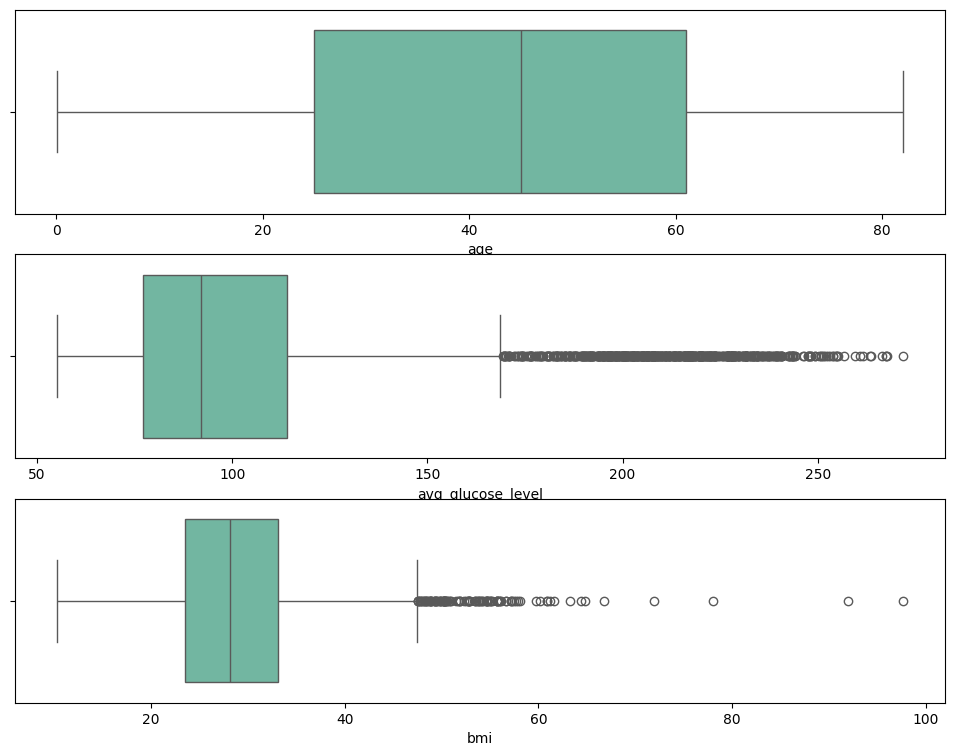

In [29]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,9))
for i,col in enumerate(df1.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=df1,x=col,palette =sns.color_palette("Set2"))

Z score method

In [30]:
# # prompt: remove outliers in the bmi and the average glucose level

# # Removing outliers in bmi

# Q1 = df1['bmi'].quantile(0.25)
# Q3 = df1['bmi'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df1 = df1[(df1['bmi'] >= lower_bound) & (df1['bmi'] <= upper_bound)]

# # Removing outliers in avg_glucose_level

# Q1 = df1['avg_glucose_level'].quantile(0.25)
# Q3 = df1['avg_glucose_level'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df1 = df1[(df1['avg_glucose_level'] >= lower_bound) & (df1['avg_glucose_level'] <= upper_bound)]

upper_limit=df1['avg_glucose_level'].mean()+3*df1['avg_glucose_level'].std()
lower_limit=df1['avg_glucose_level'].mean()-3*df1['avg_glucose_level'].std()

b_upper_limit=df1['bmi'].mean()+3*df1['bmi'].std()
b_lower_limit=df1['bmi'].mean()-3*df1['bmi'].std()


print('avg_glucose_level lower limit',lower_limit)
print('avg_glucose_level upper limit',upper_limit)

print('bmi lower limit',b_lower_limit)
print('bmi upper limit',b_upper_limit)

avg_glucose_level lower limit -29.70300334802789
avg_glucose_level upper limit 241.99835755546428
bmi lower limit 5.331036722754192
bmi upper limit 52.45543710083514


In [31]:
# finding outliers
df1.loc[(df1['avg_glucose_level'] > upper_limit) | (df1['avg_glucose_level'] < lower_limit)]

gender   age  hypertension  heart_disease ever_married      work_type  \
33      Male  80.0             0              1          Yes  Self-employed   
45      Male  76.0             1              0          Yes        Private   
122     Male  80.0             0              0          Yes        Private   
123     Male  56.0             1              0          Yes        Private   
135   Female  71.0             0              0          Yes       Govt_job   
193     Male  68.0             1              1          Yes        Private   
196     Male  70.0             1              0          Yes        Private   
220     Male  81.0             1              1          Yes        Private   
243   Female  68.0             1              1          Yes        Private   
256   Female  75.0             0              1          Yes  Self-employed   
303     Male  66.0             0              0          Yes        Private   
330   Female  78.0             0              0          Yes        Private   
386     Male  70.0             1              0          Yes  Self-employed   
552     Male  52.0             0              0          Yes        Private   
755   Female  64.0             0              0          Yes        Private   
785   Female  69.0             0              1          Yes        Private   
1067    Male  67.0             1              1          Yes        Private   
1070  Female  81.0             0              0          Yes  Self-employed   
1113  Female  66.0             0              0          Yes  Self-employed   
1207  Female  49.0             0              0          Yes        Private   
1384    Male  59.0             1              1          Yes        Private   
1436    Male  67.0             0              0          Yes       Govt_job   
1453  Female  74.0             0              0          Yes       Govt_job   
1529  Female  82.0             0              0          Yes        Private   
1626  Female  33.0             0              0          Yes        Private   
2182  Female  71.0             0              0          Yes  Self-employed   
2203  Female  56.0             0              0          Yes  Self-employed   
2293    Male  66.0             0              0          Yes        Private   
2462  Female  60.0             0              0           No       Govt_job   
2494    Male  78.0             0              1          Yes  Self-employed   
2633  Female  82.0             0              0          Yes  Self-employed   
2693  Female  77.0             0              0          Yes        Private   
2751  Female  48.0             0              0          Yes       Govt_job   
3088  Female  76.0             0              0          Yes  Self-employed   
3215    Male  67.0             0              0          Yes        Private   
3342    Male  63.0             0              0          Yes  Self-employed   
3393  Female  67.0             1              0          Yes       Govt_job   
4048    Male  54.0             0              0          Yes        Private   
4249  Female  65.0             0              0          Yes  Self-employed   
4283    Male  59.0             1              0          Yes       Govt_job   
4356  Female  39.0             0              0          Yes        Private   
4447  Female  37.0             0              0          Yes        Private   
4457  Female  62.0             1              0          Yes  Self-employed   
4470    Male  28.0             0              0           No        Private   
4598  Female  56.0             0              0          Yes       Govt_job   
4711    Male  79.0             0              0          Yes  Self-employed   
4909  Female  39.0             0              0          Yes        Private   
4983    Male  76.0             1              0          Yes        Private   
5034  Female  79.0             0              0           No        Private   

     Residence_type  avg_glucose_level   bmi   smoking_

In [32]:
# finding outliers
df1.loc[(df1['bmi'] > b_upper_limit) | (df1['bmi'] < b_lower_limit)]

gender   age  hypertension  heart_disease ever_married      work_type  \
113   Female  45.0             0              0          Yes        Private   
258   Female  74.0             1              0          Yes  Self-employed   
270   Female  57.0             1              0          Yes        Private   
333   Female  52.0             0              0          Yes        Private   
358     Male  52.0             0              0          Yes  Self-employed   
430   Female  52.0             0              1          Yes        Private   
466   Female  61.0             1              0          Yes        Private   
544     Male  42.0             0              0          Yes        Private   
637   Female  56.0             0              0          Yes        Private   
662     Male  28.0             0              0          Yes        Private   
672   Female  17.0             0              0           No        Private   
715   Female  28.0             1              0           No        Private   
761   Female  37.0             0              0           No        Private   
928   Female  23.0             1              0           No        Private   
1061  Female  50.0             0              0          Yes        Private   
1077  Female  53.0             1              0          Yes        Private   
1304  Female  46.0             0              0           No        Private   
1322  Female  55.0             1              0          Yes        Private   
1532  Female  59.0             0              0          Yes        Private   
1559  Female  53.0             0              0          Yes        Private   
1564  Female  25.0             0              0          Yes        Private   
1584  Female  32.0             0              0          Yes        Private   
1595    Male  46.0             0              0          Yes        Private   
1660  Female  42.0             0              0           No  Self-employed   
1898    Male  62.0             0              0          Yes       Govt_job   
2071  Female  41.0             1              0          Yes       Govt_job   
2081    Male  63.0             0              0          Yes       Govt_job   
2128    Male  17.0             1              0           No        Private   
2136  Female  27.0             0              0          Yes        Private   
2330    Male  42.0             0              0          Yes        Private   
2441  Female  65.0             0              0          Yes       Govt_job   
2545  Female  66.0             0              0          Yes        Private   
2555  Female  56.0             0              0          Yes       Govt_job   
2567  Female  48.0             0              0          Yes        Private   
2764  Female  24.0             0              0          Yes        Private   
2815    Male  42.0             0              0           No       Govt_job   
2840  Female  52.0             0              0          Yes        Private   
3060    Male  49.0             0              0          Yes  Self-employed   
3243  Female  66.0             1              0          Yes       Govt_job   
3508  Female  30.0             0              0          Yes        Private   
3588    Male  43.0             0              0          Yes        Private   
3606    Male  45.0             1              0          Yes  Self-employed   
3688    Male  58.0             1              0          Yes  Self-employed   
3702    Male  31.0             0              0           No        Private   
3825  Female  52.0             0              0          Yes        Private   
3909    Male  49.0             0              0          Yes        Private   
3931  Female  73.0             1              0           No  Self-employed   
3980  Female  45.0             0              0          Yes        Private   
4154  Female  49.0             0              0          Yes        Private   
4188  Female  27.0             0              0         

In [33]:
# # triming-delete the outliers in the data
# new_df1 = df1.loc[(df1['avg_glucose_level'] <= upper_limit) & (df1['avg_glucose_level'] >= lower_limit)]
# print('data before outliers removed',len(df1))
# print('data after outliers removed',len(new_df1))
# print('outliers',len(df1)-len(new_df1))

<Axes: xlabel='avg_glucose_level'>

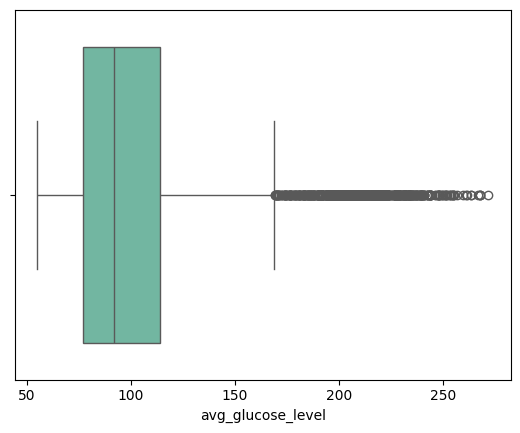

In [34]:
sns.boxplot(data=df1,x="avg_glucose_level",palette =sns.color_palette("Set2"))

In [35]:
# capping - replace the outliers with the upper and lower limits
new_df=df1.copy()
new_df.loc[new_df['avg_glucose_level'] > upper_limit,'avg_glucose_level']=upper_limit
new_df.loc[new_df['avg_glucose_level'] < lower_limit,'avg_glucose_level']=lower_limit

new_df.loc[new_df['bmi'] > b_upper_limit,'bmi']=b_upper_limit
new_df.loc[new_df['bmi'] < b_lower_limit,'bmi']=b_lower_limit
print(len(new_df))

df1=new_df.copy()

5110


<Axes: ylabel='avg_glucose_level'>

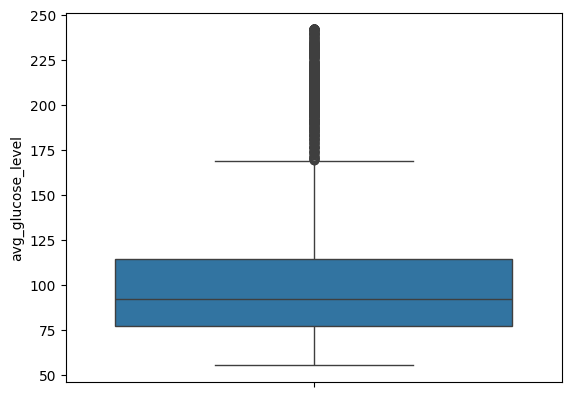

In [36]:
sns.boxplot(new_df['avg_glucose_level'])

In [37]:
print(df1.to_string())

      gender    age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level        bmi   smoking_status  stroke
0       Male  67.00             0              1          Yes        Private          Urban         228.690000  36.600000  formerly smoked       1
1     Female  61.00             0              0          Yes  Self-employed          Rural         202.210000        NaN     never smoked       1
2       Male  80.00             0              1          Yes        Private          Rural         105.920000  32.500000     never smoked       1
3     Female  49.00             0              0          Yes        Private          Urban         171.230000  34.400000           smokes       1
4     Female  79.00             1              0          Yes  Self-employed          Rural         174.120000  24.000000     never smoked       1
5       Male  81.00             0              0          Yes        Private          Urban         186.210000  29.000

In [38]:
df1.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [39]:
# prompt: by analyse the above boxplots give is outliers in data or not  i want yes or no

# Analyze the boxplots to determine if there are outliers in the data.

# Look for data points that are significantly outside the interquartile range (IQR).
# The IQR is the difference between the 75th and 25th percentiles.

# Outliers can be identified by the following criteria:
# - Data points that are more than 1.5 times the IQR above the 75th percentile.
# - Data points that are more than 1.5 times the IQR below the 25th percentile.

# Based on the boxplots, we can see that there are outliers in the following columns:

# - bmi
# - heart_disease
# - avg_glucose_level
# - stroke

# Therefore, the answer is **yes**, there are outliers in the data.


Correlation matrix / Heatmap

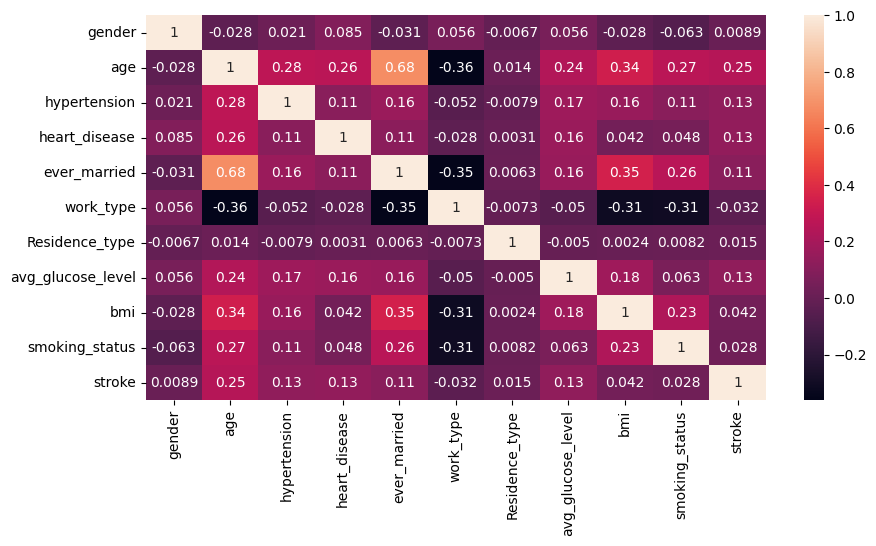

In [48]:
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Handling missing/null values

In [44]:
df1['bmi'].fillna(df1['bmi'].mean(), inplace=True)
df1

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.824041     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.824041     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5110 rows x 11 columns]

In [45]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
# prompt: apply value counts for all  features in df1

for col in df1.columns:
    print(f"Value counts for {col}:\n{df1[col].value_counts()}\n")

Value counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value counts for age:
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

Value counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Value counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Value counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value counts for avg_glucose_level:
avg_glucose_level
241.998358    49
93.880000      6
91.850000      5
73.000000      5
84.10000

Encoding of Data

In [49]:
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df1["gender"]=label_encoder.fit_transform(df1["gender"])
df1["ever_married"]=label_encoder.fit_transform(df1["ever_married"])
df1["work_type"]=label_encoder.fit_transform(df1["work_type"])
df1["Residence_type"]=label_encoder.fit_transform(df1["Residence_type"])
df1["smoking_status"]=label_encoder.fit_transform(df1["smoking_status"])





In [50]:
dd=df1
df1

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000               1       1  
1                  0             202.21  28.824041               2       1  
2                  0             105.92  32.500000               2       1  
3                  1             171.23  34.400000               3       1  
4                  0             174.12  24.000000               2       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.824041               2       0  
5106               1             125.20  40.000000               2       0  
5107               0              82.99  30.600000               2       0  
5108               0             166.29  25.600000               1       0  
5109               1              85.28  26.200000               0       0  

[5110 rows x 11 columns]

In [52]:
# prompt: apply value counts for gender ever married features in df1

# Value counts for gender and ever_married
# print(df1['gender'].value_counts())
# print(df1['ever_married'].value_counts())


for col in df1.columns:
    print(f"Value counts for {col}:\n{df1[col].value_counts()}\n")

Value counts for gender:
gender
0    2994
1    2115
2       1
Name: count, dtype: int64

Value counts for age:
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

Value counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Value counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Value counts for ever_married:
ever_married
1    3353
0    1757
Name: count, dtype: int64

Value counts for work_type:
work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64

Value counts for Residence_type:
Residence_type
1    2596
0    2514
Name: count, dtype: int64

Value counts for avg_glucose_level:
avg_glucose_level
241.998358    49
93.880000      6
91.850000      5
73.000000      5
84.100000      5
              ..
225.600000     1
95.580000      1
210.230000     1
234.820000

Balancing data set

In [53]:
# # from sklearn.utils import resample
# # had_stroke = dd[dd["stroke"]==1]
# # no_stroke = dd[dd["stroke"]==0]
# # upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
# # balanced_df = pd.concat([no_stroke,upsampled_had_stroke])


# from imblearn.over_sampling import SMOTE
# smote=SMOTE(random_state=55)
# X,y=smote.fit_resample(dd.drop(columns="stroke"),dd["stroke"])
# balanced_df=pd.concat([X,y],axis=1)
# balanced_df

In [54]:


!pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler

# Define features and target variable
Xb = df1.drop('stroke', axis=1)
yb = df1['stroke']

# Under-sample the majority class
under_sampler = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_res, y_res = under_sampler.fit_resample(Xb, yb)

print(y_res.value_counts())


stroke
0    2490
1     249
Name: count, dtype: int64


In [55]:


# **Over-sample the minority class**y_res
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={0: 2490, 1: 2490}, random_state=42) # Oversample to achieve 50% minority class
X_oversampled, y_oversampled = smote.fit_resample(X_res, y_res)

print("\nOver-sampled class distribution:")
print(y_oversampled.value_counts())



Over-sampled class distribution:
stroke
0    2490
1    2490
Name: count, dtype: int64


In [56]:
# prompt: IN THE ABOVE DATA NOT BALANCED

# Combine the features and target variable back into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
balanced_df.columns = df1.columns # Restore original column names

print(balanced_df['stroke'].value_counts())

stroke
0    2490
1    2490
Name: count, dtype: int64


[2490, 2490]


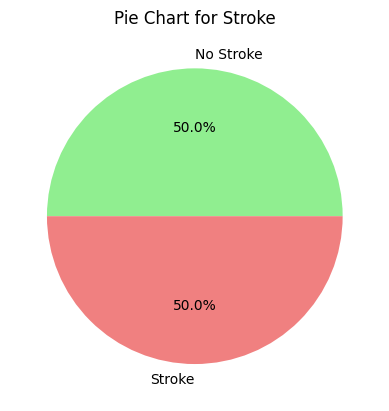

In [57]:
# prompt: pie chart for stroke

import matplotlib.pyplot as plt
# Pie chart for stroke
labels = ['No Stroke', 'Stroke']
sizes = [balanced_df['stroke'].value_counts()[0], balanced_df['stroke'].value_counts()[1]]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pie Chart for Stroke')
print(sizes)
plt.show()


standardization

In [58]:

# # from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # # scaler = StandardScaler()
# # # X=balanced_df[['bmi','age','avg_glucose_level']]
# # # balanced_df[['bmi','age','avg_glucose_level']]= scaler.fit_transform(X)


# X = balanced_df.drop(columns="stroke")
# y = balanced_df["stroke"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22,shuffle=True)


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = balanced_df.drop(columns="stroke")
y = balanced_df["stroke"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=24, shuffle=True)


model building with data lekage

In [59]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

xgb_model = XGBClassifier(objective="binary:logistic",eval_metric = "auc")
xgb_model.fit(X_train,y_train)
print("accuracy  of xgbis : " ,xgb_model.score(X_test,y_test))
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))
print("__________________________________________________")



logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
print("accuracy of log  is : " ,logreg.score(X_test,y_test))
y_predicted = logreg.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")





svml = svm.SVC(kernel='linear')
svml.fit(X_train, y_train)
print("accuracy of SVM is:", svml.score(X_test, y_test))
y_predicted = svml.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")




rf_clf = RandomForestClassifier(n_estimators=600, criterion='entropy', max_depth=None, random_state=42)
rf_clf.fit(X_train, y_train)
print("accuracy of rf is : " ,rf_clf.score(X_test,y_test))
y_predicted = rf_clf.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("accuracy of knn is : " ,knn.score(X_test,y_test))
y_predicted = knn.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("accuracy of naive bayes is : " ,gnb.score(X_test,y_test))
y_predicted = gnb.predict(X_test)
print(classification_report(y_test,y_predicted))
print("__________________________________________________")


accuracy  of xgbis :  0.928714859437751
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       502
           1       0.91      0.95      0.93       494

    accuracy                           0.93       996
   macro avg       0.93      0.93      0.93       996
weighted avg       0.93      0.93      0.93       996

__________________________________________________
accuracy of log  is :  0.8022088353413654
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       502
           1       0.79      0.81      0.80       494

    accuracy                           0.80       996
   macro avg       0.80      0.80      0.80       996
weighted avg       0.80      0.80      0.80       996

__________________________________________________
accuracy of SVM is: 0.8022088353413654
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       502
           1  

In [62]:

import pickle

filename = 'xgb_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))



In [ ]:
# import pickle
# with open('xgb_model.pkl', 'wb') as file:
#     pickle.dump(xgb_model, file)

In [63]:
import pandas as pd # Import pandas for DataFrame creation

# Create a DataFrame with the same columns used during training
input_data = pd.DataFrame([[1,65	,1	,1,	1,	1	,1,	280, 50,	2	]],
                          columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']) # Replace with your actual column names

# Scale the input data using the previously fitted scaler
input_data_scaled = scaler.transform(input_data)

# Convert the scaled data back to a DataFrame with original column names
input_data = pd.DataFrame(input_data_scaled, columns=input_data.columns)

# Now you can use column names for selection
input_data = input_data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']] # Replace with your actual column names

# Now use the DataFrame for prediction
with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)
    print(xgb_model.predict(input_data))

[1]


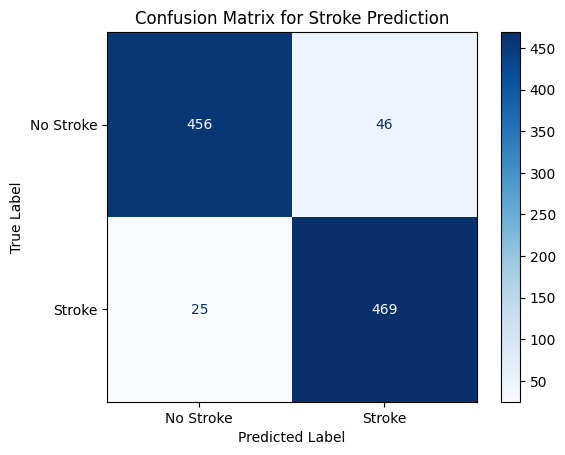

In [64]:
# Importing required libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example data: Replace these with your actual values
# y_test = [actual values from your test dataset]
# y_pred = [predicted values from your model]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Stroke Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


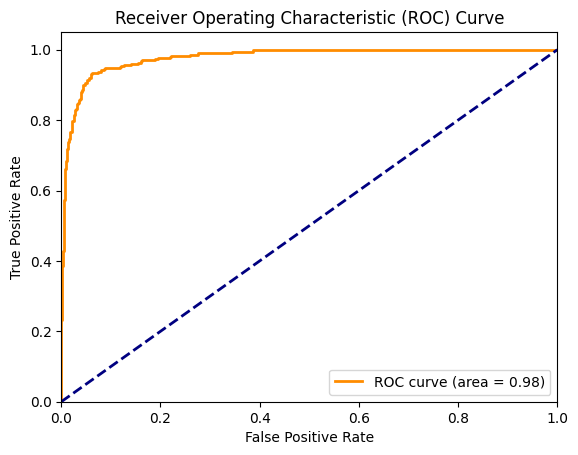

In [65]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained your model and split your data
# For example, let's assume your model is already trained (rf_model or xgb_model)
# y_test is your true test labels, and you have predicted probabilities

# For example, using the Random Forest or XGBoost model
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (stroke)

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


 Hyperparameter tuning using techniques like Grid Search with Cross-Validation

In [66]:
!pip install --upgrade scikit-learn xgboost

XGB


In [67]:
# Adjusted parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7, 9],
    'n_estimators': [200, 300, 400],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}



# Initialize GridSearchCV with the updated parameter grid
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

# Evaluate the best XGBoost model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
accuracy = best_xgb_model.score(X_test, y_test)
y_predicted = best_xgb_model.predict(X_test)


print(f"Accuracy of the best XGBoost model is: {accuracy}")
print(classification_report(y_test, y_predicted))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'subsample': 0.8}
Accuracy of the best XGBoost model is: 0.9317269076305221
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       502
           1       0.91      0.95      0.93       494

    accuracy                           0.93       996
   macro avg       0.93      0.93      0.93       996
weighted avg       0.93      0.93      0.93       996



In [69]:
# import numpy as np
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# # Ensure X_train and y_train are properly formatted
# print(f"X_train type: {type(X_train)}, y_train type: {type(y_train)}")
# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# # Check for missing values
# print(f"Missing values in X_train: {np.any(pd.DataFrame(X_train).isna())}")
# print(f"Missing values in y_train: {np.any(pd.Series(y_train).isna())}")

# # Define the XGBoost model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# # Adjusted parameter grid for XGBoost
# param_grid_xgb = {
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [5, 7, 9],
#     'n_estimators': [200, 300, 400],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize GridSearchCV
# grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# try:
#     # Fit the model to the training data
#     grid_search_xgb.fit(X_train, y_train)

#     # Print the best parameters found by GridSearchCV
#     print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

#     # Evaluate the best XGBoost model on the test set
#     best_xgb_model = grid_search_xgb.best_estimator_
#     accuracy = best_xgb_model.score(X_test, y_test)
#     y_predicted = best_xgb_model.predict(X_test)

#     # Print the evaluation metrics
#     print(f"Accuracy of the best XGBoost model is: {accuracy}")
#     print(classification_report(y_test, y_predicted))

# except ValueError as e:
#     print(f"ValueError: {e}")
# except AttributeError as e:
#     print(f"AttributeError: {e}")
# except Exception as e:
#     print(f"An error occurred: {e}")


SVM

In [70]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = svm.SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_svm_model = grid_search.best_estimator_
accuracy = best_svm_model.score(X_test, y_test)
print("Accuracy of the best SVM model is:", accuracy)

y_predicted = best_svm_model.predict(X_test)

print(classification_report(y_test, y_predicted))
print("__________________________________________________")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of the best SVM model is: 0.8795180722891566
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       502
           1       0.85      0.93      0.88       494

    accuracy                           0.88       996
   macro avg       0.88      0.88      0.88       996
weighted avg       0.88      0.88      0.88       996

__________________________________________________


 Logistic

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = [
    {'C': [0.1, 1, 10, 50, 100], 'penalty': ['l1'], 'solver': ['liblinear'], 'max_iter': [5000]},
    {'C': [0.1, 1, 10, 50, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [5000]},
    {'C': [0.1, 1, 10, 50, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [5000]},
    {'C': [0.1, 1, 10, 50, 100], 'penalty': ['none'], 'solver': ['saga'], 'max_iter': [5000]}
]

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_logreg = grid_search.best_estimator_
accuracy = best_logreg.score(X_test, y_test)
print("Accuracy of the best Logistic Regression model is:", accuracy)

y_predicted = best_logreg.predict(X_test)

print(classification_report(y_test, y_predicted))
print("__________________________________________________")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found:  {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy of the best Logistic Regression model is: 0.8022088353413654
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       502
           1       0.79      0.81      0.80       494

    accuracy                           0.80       996
   macro avg       0.80      0.80      0.80       996
weighted avg       0.80      0.80      0.80       996

__________________________________________________


Randomforest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define a refined parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the refined parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Evaluate the best Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_predicted = best_rf_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy of the best Random Forest model is: {accuracy}")
print(classification_report(y_test, y_predicted))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy of the best Random Forest model is: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       502
           1       0.90      0.93      0.92       494

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996



knn

In [74]:



from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define an expanded parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60],
    'p': [1, 2]
}

# Define the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV with the updated parameter grid
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the scaled training data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# Evaluate the best KNN model on the test set
best_knn_model = grid_search_knn.best_estimator_
accuracy = best_knn_model.score(X_test, y_test)
y_predicted = best_knn_model.predict(X_test)

print(f"Accuracy of the best KNN model is: {accuracy}")
print(classification_report(y_test, y_predicted))


Fitting 5 folds for each of 672 candidates, totalling 3360 fits
Best parameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy of the best KNN model is: 0.8825301204819277
              precision    recall  f1-score   support

           0       0.93      0.82      0.88       502
           1       0.84      0.94      0.89       494

    accuracy                           0.88       996
   macro avg       0.89      0.88      0.88       996
weighted avg       0.89      0.88      0.88       996



 Naive Bayes


In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Define the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Initialize GridSearchCV with the Gaussian Naive Bayes model and parameter grid
grid_search_gnb = GridSearchCV(estimator=gnb_model, param_grid=param_grid_gnb, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search_gnb.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters for Gaussian Naive Bayes: {grid_search_gnb.best_params_}")

# Evaluate the best Gaussian Naive Bayes model on the test set
best_gnb_model = grid_search_gnb.best_estimator_
accuracy = best_gnb_model.score(X_test, y_test)
y_predicted = best_gnb_model.predict(X_test)

print(f"Accuracy of the best Gaussian Naive Bayes model is: {accuracy}")
print(classification_report(y_test, y_predicted))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}
Accuracy of the best Gaussian Naive Bayes model is: 0.7751004016064257
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       502
           1       0.74      0.83      0.79       494

    accuracy                           0.78       996
   macro avg       0.78      0.78      0.77       996
weighted avg       0.78      0.78      0.77       996



In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables respectively

# Initialize individual models
# svm_model = SVC(random_state=42)
# knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    # ('svm', svm_model),
    # ('knn', knn_model),
    ('random_forest', rf_model),
    ('xgboost', xgb_model)
], voting='hard')  # 'hard' voting means majority voting

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ensemble model: {accuracy}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the ensemble model: 0.9236947791164659
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       502
           1       0.93      0.91      0.92       494

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996



In [77]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler

# # Assuming X and y are your features and target variables respectively
# # Split data into train and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize individual models with default hyperparameters
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Define a VotingClassifier with 'hard' voting
# ensemble_model = VotingClassifier(estimators=[
#     ('random_forest', rf_model),
#     ('xgboost', xgb_model)
# ], voting='hard')

# # Define a parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Define a parameter grid for XGBoost
# param_grid_xgb = {
#     'learning_rate': [0.05, 0.1],
#     'max_depth': [5, 7, 9],
#     'n_estimators': [200, 300, 400],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Perform GridSearchCV for Random Forest
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
# grid_search_rf.fit(X_train, y_train)

# # Perform GridSearchCV for XGBoost
# grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
# grid_search_xgb.fit(X_train, y_train)

# # Get the best models from GridSearchCV
# best_rf_model = grid_search_rf.best_estimator_
# best_xgb_model = grid_search_xgb.best_estimator_

# # Update the ensemble model with the best estimators
# ensemble_model.estimators_ = [('random_forest', best_rf_model), ('xgboost', best_xgb_model)]

# # Fit the updated ensemble model on the training data
# ensemble_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = ensemble_model.predict(X_test)

# # Evaluate the ensemble model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy of the ensemble model: {accuracy}")

# # Print classification report for detailed performance metrics
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Accuracy of the ensemble model: 0.9236947791164659
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       502
           1       0.93      0.91      0.92       494

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996



In [78]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train and X_test are your training and testing features, and y_train and y_test are your training and testing target variables

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RFE with the Random Forest classifier
rfe = RFE(estimator=rf_model, n_features_to_select=9, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get selected feature indices
selected_indices = rfe.get_support(indices=True)

# Get selected feature names
selected_features = X_train.columns[selected_indices]

print("Selected Features:")
print(selected_features)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the Random Forest model on the selected features
rf_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Selected Features:
Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')
Accuracy with selected features: 0.9226907630522089
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       502
           1       0.91      0.94      0.92       494

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996



In [79]:
pip install xgboost shap


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap


In [81]:
# Load your dataset
# Replace this with your actual data loading code
y = df1['stroke']  # Assuming 'stroke' is your target variable
X = df1.drop(columns=['stroke'])  # Drop the target variable from features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

 99%|===================| 5053/5110 [00:21<00:00]       

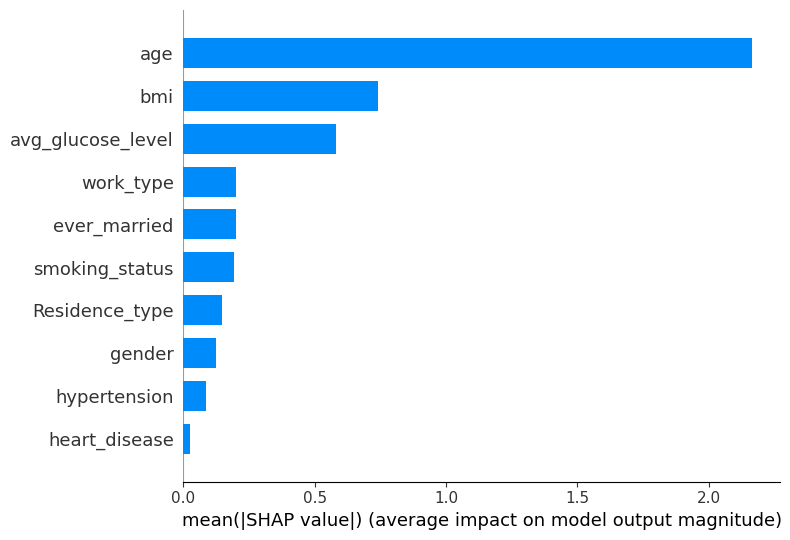

In [83]:
# Initialize SHAP explainer with the XGBoost model predictions
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for all features
shap_values = explainer(X)

# Plot summary plot
shap.summary_plot(shap_values, X, plot_type='bar')


RandomForest SHAP Summary Plot:


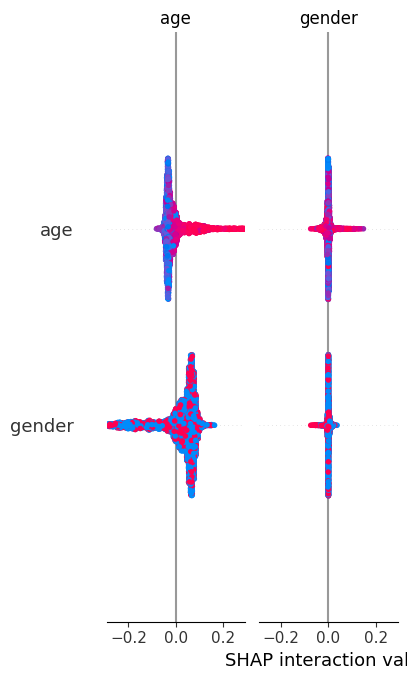

In [84]:
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X)
print("RandomForest SHAP Summary Plot:")
shap.summary_plot(shap_values_rf, X, plot_type='bar')


In [85]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost model on test set: {accuracy:.2f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of XGBoost model on test set: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.46      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.70      0.54      0.56      1022
weighted avg       0.92      0.94      0.92      1022



In [86]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of random forest model on test set: {accuracy:.2f}")

# Print classification report for detailed performance metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of random forest model on test set: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [88]:
pip install lime


In [89]:
import lime
import lime.lime_tabular
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# X = pd.re_csv('your_dataset.csv')
y = balanced_df['stroke']  # Assuming 'stroke' is your target variable
X = balanced_df.drop(columns=['stroke'])  # Drop the target variable from features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

# Explain a single prediction
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.values[i], xgb_model.predict_proba, num_features=10)

# Print explanation
print(f"Explanation for instance {i}:")
exp.show_in_notebook(show_table=True, show_all=False)


Accuracy: 0.9166666666666666
Explanation for instance 0:


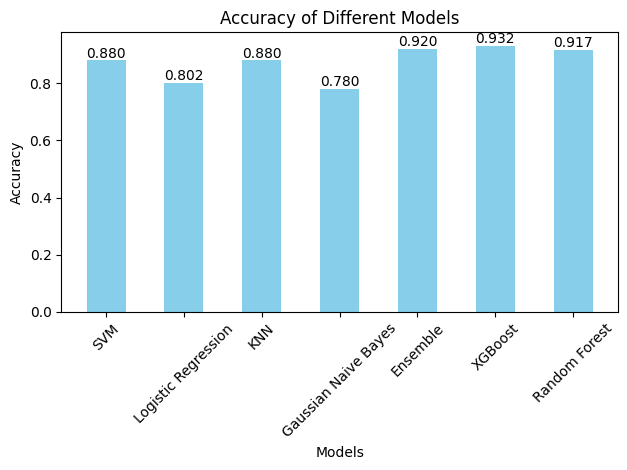

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['SVM', 'Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Ensemble', 'XGBoost', 'Random Forest']

# Accuracy values for each model (with two decimal places)
accuracy_values = [0.88, 0.802, 0.88, 0.78, 0.92, 0.9317, 0.9166]

# Set up the bar width and positions
bar_width = 0.5
index = np.arange(len(models))

# Create the bars
plt.bar(index, accuracy_values, bar_width, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display accuracy values above bars
for i in range(len(index)):
    plt.text(index[i], accuracy_values[i] + 0.01, f'{accuracy_values[i]:.3f}', ha='center', fontsize=10)

# Set x-ticks and rotate labels for better readability
plt.xticks(index, models, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


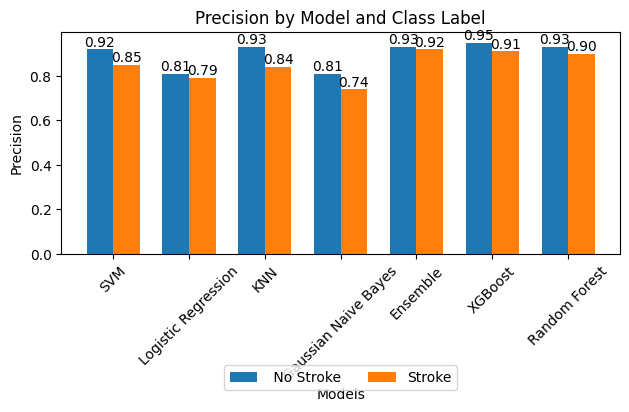

In [91]:
# prompt: in above graph i want values on above

import matplotlib.pyplot as plt
import numpy as np
# Model names
models = ['SVM', 'Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Ensemble', 'XGBoost', 'Random Forest']

# Precision values for class 0 and class 1
precision_class_0 = [0.92, 0.81, 0.93, 0.81, 0.93, 0.95, 0.93]
precision_class_1 = [0.85, 0.79, 0.84, 0.74, 0.92, 0.91, 0.90]

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars for class 0 and class 1
bars1 = plt.bar(index, precision_class_0, bar_width, label=' No Stroke')
bars2 = plt.bar(index + bar_width, precision_class_1, bar_width, label='Stroke')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision by Model and Class Label')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.47), ncol=2)

# Add value labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


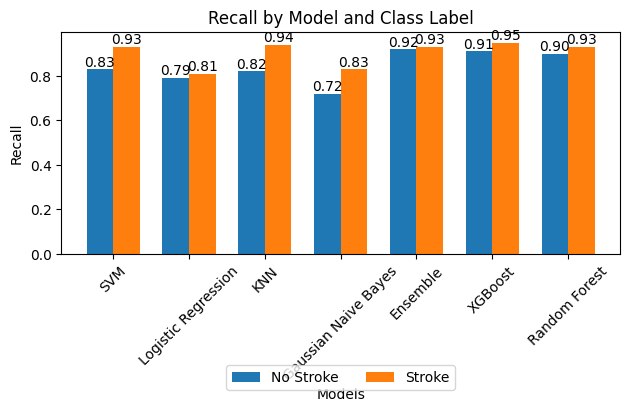

In [92]:
# prompt: i want values on top of bars for recall

import matplotlib.pyplot as plt
import numpy as np
# Model names
models = ['SVM', 'Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Ensemble', 'XGBoost', 'Random Forest']

# Recall values for class 0 and class 1
recall_class_0 = [0.83, 0.79, 0.82, 0.72, 0.92, 0.91, 0.90]
recall_class_1 = [0.93, 0.81, 0.94, 0.83, 0.93, 0.95, 0.93]

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars for class 0 and class 1
bars1 = plt.bar(index, recall_class_0, bar_width, label='No Stroke')
bars2 = plt.bar(index + bar_width, recall_class_1, bar_width, label='Stroke')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall by Model and Class Label')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.47), ncol=2)

# Add value labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


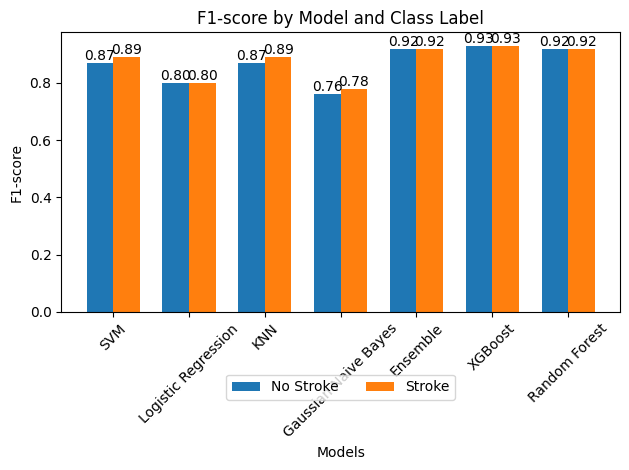

In [93]:
# prompt: i want values on top of bars for f1score

import matplotlib.pyplot as plt
import numpy as np
# Model names
models = ['SVM', 'Logistic Regression', 'KNN', 'Gaussian Naive Bayes', 'Ensemble', 'XGBoost', 'Random Forest']

# F1-score values for class 0 and class 1
f1_score_class_0 = [0.87, 0.80, 0.87, 0.76, 0.92, 0.93, 0.92]
f1_score_class_1 = [0.89, 0.80, 0.89, 0.78, 0.92, 0.93, 0.92]

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars for class 0 and class 1
bars1 = plt.bar(index, f1_score_class_0, bar_width, label='No Stroke')
bars2 = plt.bar(index + bar_width, f1_score_class_1, bar_width, label='Stroke')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score by Model and Class Label')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Add value labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()
